#Problem Statement
The main objective of this project is to analyze the **Heart Stroke Prediction Dataset** to generate insights and build machine learning models that can effectively predict the risk of a heart stroke. The analysis focuses on cleaning and preparing the dataset, performing exploratory data analysis (EDA), visualizing key trends, and evaluating the performance of various machine learning models. This data-driven approach aims to assist healthcare providers in early stroke detection, improving patient outcomes, and reducing healthcare costs.

##Heart Stroke Prediction Project
This notebook implements various regression models to predict heart stroke risk. It includes:

 - Data preprocessing and visualization

- Model building using Linear Regression, Ridge, Lasso, and Logistic Regression

- Model evaluation using metrics like Accuracy, RMSE, Precision, Recall, F1 Score, and Confusion Matrix

- Insights into dataset bias and model performance

##Milestone -1

### Uploading Files in Google Colab

To work with local files in Google Colab, we use the `files.upload()` function from the `google.colab` library. This function allows us to upload files from our local system directly into the Colab environment for further processing.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


### Importing Necessary Libraries

- Before we begin exploring and analyzing the dataset, we need to import the necessary Python libraries.

- Below, we load essential libraries for data manipulation, visualization, and machine learning.
- By importing these libraries, we ensure that we have the necessary tools to handle the data efficiently throughout the notebook.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

### Loading the Dataset

We use the `pandas` library to load the dataset into a DataFrame. The `pd.read_csv()` function reads the CSV file and stores it in the variable `df`, allowing us to easily manipulate and analyze the data.

In [3]:
# Load the dataset (update the path as needed)
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

### 1. Basic Data Exploration

To gain an initial understanding of the dataset, we display the first few rows using the `head()` function. This allows us to quickly inspect the data and see its structure, including the features and their values.

In [4]:
# 1. Basic Data Exploration
# Display first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## Dataset Overview

In this section, we will take a closer look at our dataset to understand its structure. The shape of the dataset is an important aspect as it provides insight into the number of records and features present.
### Shape of the Dataset

The dataset consists of a total of 5110 rows and 12 columns. This indicates that we have 5110 instances and 12 features to work with for our analysis and modeling tasks.

In [5]:
# Shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (5110, 12)


In [6]:
# Data information
print("Information about the dataset:")
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Key Insights

The dataset contains the following information:
- **Total Entries**: 5110
- **Columns**: age, gender, hypertension, heart disease, BMI, and more
- **Data Types**: float64(3), int64(4), object(5)

## Summary Statistics for Numerical Columns

The following section provides a summary of the key statistics for the numerical features in the dataset. These statistics help in understanding the distribution and spread of the data, which includes metrics such as:

- **Count**: Number of non-null entries for each feature.
- **Mean**: The average value.
- **Standard Deviation (std)**: Measure of how spread out the values are from the mean.
- **Minimum (min)**: The smallest value.
- **25th, 50th (Median), and 75th Percentiles**: These indicate the distribution of the data, helping to understand the spread.
- **Maximum (max)**: The largest value.

In [7]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
7

## Summary Statistics for Categorical Columns

This section provides a summary of the categorical features in the dataset. The statistics for categorical columns give us an understanding of the distribution of categories within each feature. The following key metrics are included:

- **Count**: Number of non-null entries for each feature.
- **Unique**: The number of unique categories or values in each column.
- **Top**: The most frequent category (mode) in each column.
- **Frequency (freq)**: The number of occurrences of the top category.

In [8]:
# Summary statistics for categorical columns
print("Summary statistics for categorical columns:")
print(df.describe(include=object))

Summary statistics for categorical columns:
        gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892


## Unique Values per Column

In this section, we analyze the number of unique values present in each column. Understanding the uniqueness of the data in each feature helps in identifying categorical variables, potential key identifiers, or redundant features with low variability.

### Key Insights:

- **Unique Value Count**: This metric shows the number of distinct values in each column.
  - For categorical columns, it provides insight into the diversity of categories.
  - For numerical columns, it helps determine whether the feature might be discrete or continuous.
  
- **Features with Low or High Uniqueness**: Columns with very few unique values might indicate categorical data or binary features, whereas those with a high count could be numerical or ID-like columns.

This information helps in selecting appropriate data preprocessing techniques, such as encoding for categorical variables or handling ID columns.


In [9]:
# 2. Finding unique values, null values, and percentage of null values

# Unique values per column
print("Unique values in each column:")
print(df.nunique())

Unique values in each column:
id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


## Null Values per Column

In this section, we identify the number of missing or null values in each column. Missing data is important to address as it can impact the quality and performance of our models.

### Key Insights:

- **Null Value Count**: This shows how many entries are missing in each column.
- **Data Imputation**: Columns with missing values may require imputation or other techniques to handle the missing data before analysis.


In [10]:
# Null values per column
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## Percentage of Null Values per Column

This section shows the percentage of missing or null values in each column. Understanding the proportion of missing data helps in deciding the best strategy for handling it.

### Key Insights:

- **High Null Percentage**: Columns with a high percentage of missing values may need special treatment, such as removal or advanced imputation methods.
- **Low Null Percentage**: Columns with a low percentage of missing values might require simpler imputation techniques (e.g., mean, median, or mode).

Handling missing data appropriately ensures better model performance and more accurate insights.


In [11]:
# Percentage of null values per column
print("Percentage of null values in each column:")
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)

Percentage of null values in each column:
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


## Handling Missing Values in Numerical Columns

For numerical columns like `BMI`, we can handle missing values by replacing them with the column's mean. This approach ensures that the missing data is filled in with a value representative of the dataset without introducing bias.

### Example:
We replace the missing values in the `BMI` column with the mean value using the following code:

In [12]:
# 3. Handling missing values
# Filling missing values with mean (for numerical columns like BMI)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [13]:
# Document observations
print("Observations:")
print(f"1. The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"2. The 'bmi' column has {df.isnull().sum()['bmi']} missing values, accounting for {null_percentage['bmi']:.2f}% of the data.")
print("3. We chose to fill missing values in the 'bmi' column using the mean.")

Observations:
1. The dataset contains 5110 rows and 12 columns.
2. The 'bmi' column has 0 missing values, accounting for 3.93% of the data.
3. We chose to fill missing values in the 'bmi' column using the mean.


In [14]:
# Overwrite the original variable with the cleaned data
df = df.copy()

# Print the first few rows to confirm the changes
print(df.head())
# Null values per column
print("Null values in each column:")
print(df.isnull().sum())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1  
Null values in each column

#Milestone - 2

**I. General tasks. (Data Visualization)**

1. Frame your questions
2. Plot the graph required. (Min 5 graphs)
3. Make observations.


**(1)How does age relate to the likelihood of stroke?**

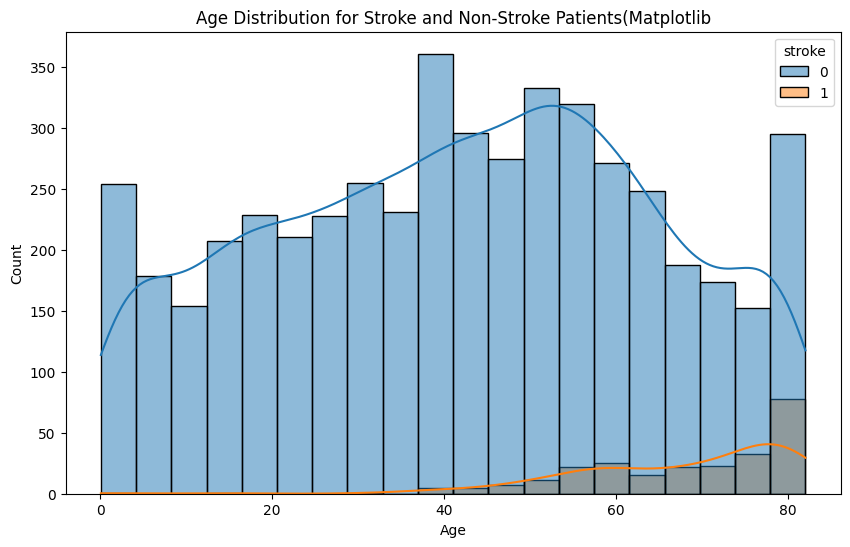

In [15]:
# Distribution of age among stroke and non-stroke patients Using Matplotlib
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='stroke', kde=True)
plt.title('Age Distribution for Stroke and Non-Stroke Patients(Matplotlib')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Observations:**

1. **Higher Stroke Risk with Age**: Stroke risk increases significantly after age 40, with a notable rise in elderly individuals (60–80).

2. **Peak Stroke Occurrence**: Elderly individuals (ages 60–80) show the highest stroke occurrences, reinforcing age as a key factor.

3. **Non-Stroke Population**: Younger individuals (under 40) dominate the non-stroke group, showing lower stroke risk.

4. **Consistent Visualization**: Seaborn confirms similar age-related trends, ensuring reliable insights.

**Conclusion**: Age is a crucial predictor of stroke, emphasizing its importance in risk assessment models.


**(2)Is there any correlation between BMI and stroke incidence or risk?**

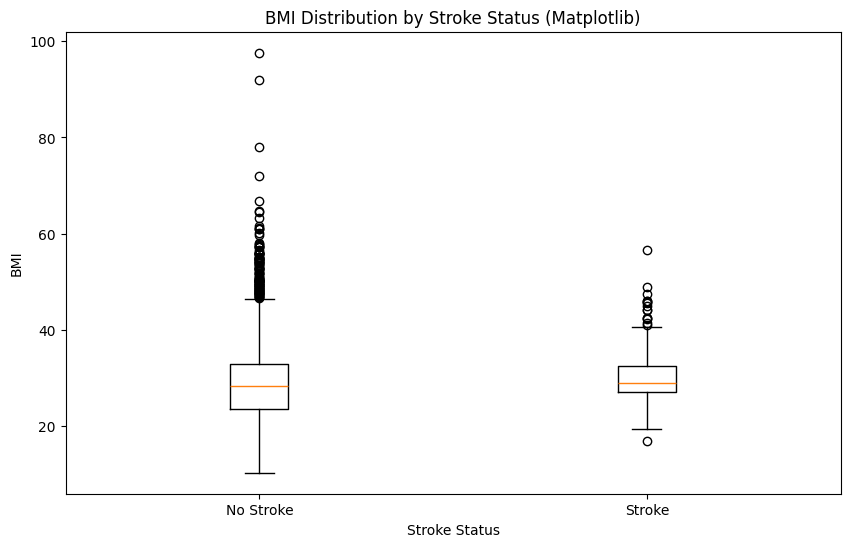

In [16]:
# Using Matplotlib
# Boxplot of BMI by stroke status
plt.figure(figsize=(10,6))
plt.boxplot([df[df['stroke'] == 0]['bmi'], df[df['stroke'] == 1]['bmi']], labels=['No Stroke', 'Stroke'])
plt.title('BMI Distribution by Stroke Status (Matplotlib)')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.show()

**Observations:**

1. **Similar Median BMI**: Stroke and non-stroke groups have similar median BMI values, suggesting BMI alone may not strongly influence stroke risk.

2. **Wider BMI Range for Non-Stroke**: Non-stroke cases show a wider BMI range, indicating varied BMI levels don’t necessarily lead to strokes.

3. **Outliers in Both Groups**: Both groups have outliers with high BMI, showing that extreme BMI values alone do not predict strokes.

4. **No Strong Correlation**: BMI does not show a clear relationship with stroke incidence, highlighting the need to consider other factors.

**Conclusion**: BMI is not a primary stroke risk factor but may contribute when combined with other health indicators.


**(3)How does glucose level impact stroke risk?**

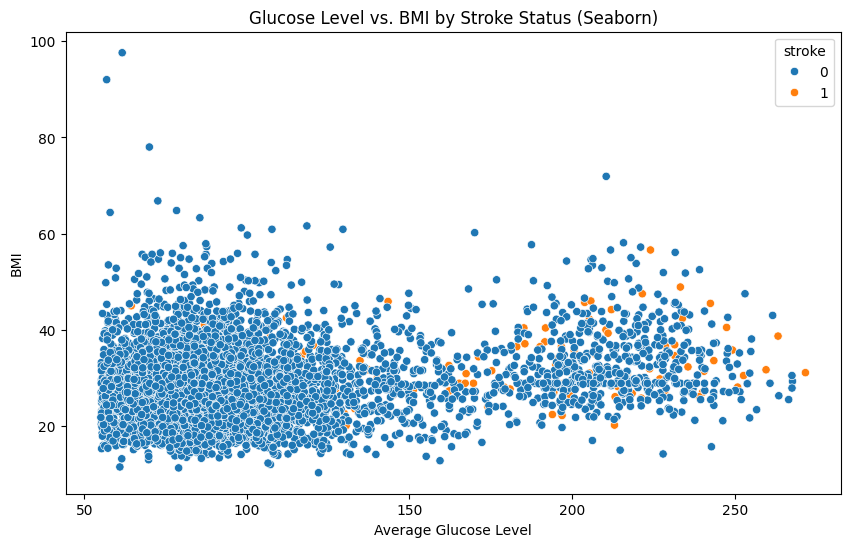

In [17]:
# Scatterplot of average glucose level and BMI by stroke status
# Using Seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke')
plt.title('Glucose Level vs. BMI by Stroke Status (Seaborn)')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.show()

**Observations:**

1. **Glucose and BMI Correlation**: A positive correlation exists between average glucose levels and BMI, meaning both tend to rise together.

2. **High Glucose in Both Cases**: Elevated glucose levels are found in both stroke and non-stroke cases, indicating high glucose alone isn't a definitive stroke predictor.

3. **BMI's Limited Role**: Stroke cases occur across all BMI ranges, showing BMI alone has no strong link to stroke risk.

4. **Stroke Clustering**: A slight clustering of stroke cases is seen at higher glucose and BMI levels, but the correlation is weak.

5. **No Linear Relationship**: Glucose levels and BMI don’t show a clear linear relationship, suggesting they contribute to stroke risk independently.

**Conclusion**:
Stroke risk depends on factors beyond just glucose and BMI, such as age, hypertension, or other health conditions.


**(4) How do hypertension and heart disease jointly affect stroke risk?**

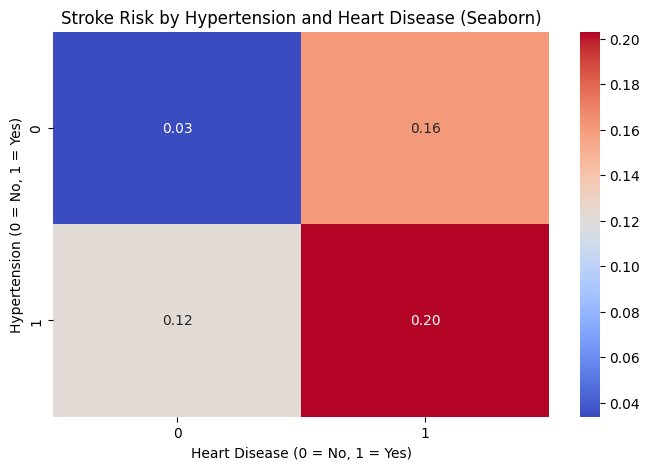

In [18]:
# Using Seaborn: Heatmap
stroke_risk_matrix = pd.crosstab(df['hypertension'], df['heart_disease'], values=df['stroke'], aggfunc='mean').fillna(0)
plt.figure(figsize=(8,5))
sns.heatmap(stroke_risk_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Stroke Risk by Hypertension and Heart Disease (Seaborn)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Hypertension (0 = No, 1 = Yes)')
plt.show()

**Observations:**

- **Hypertension and Heart Disease (0,0)**: For patients with neither hypertension nor heart disease, the probability of stroke is **0.03**. This represents the lowest risk group.

- **Hypertension Only (1,0)**: For patients with hypertension but no heart disease, the probability of stroke increases to **0.12**.

- **Heart Disease Only (0,1)**: For patients with heart disease but no hypertension, the probability of stroke is slightly higher at **0.16**.

- **Both Hypertension and Heart Disease (1,1)**: For patients with both conditions, the probability of stroke is the highest at **0.20**.

**Key Insights**:
1. The risk of stroke is highest when both hypertension and heart disease are present (**1,1**).  
2. The risk is significantly lower when only one condition is present (**1,0** or **0,1**).  
3. The lowest risk is observed when neither condition is present (**0,0**).  

**Conclusion**:  
The combination of hypertension and heart disease markedly increases stroke risk, highlighting the compounded impact of these conditions. Both conditions independently contribute to stroke risk, but their combined effect poses the greatest threat.


# **Pairplot**

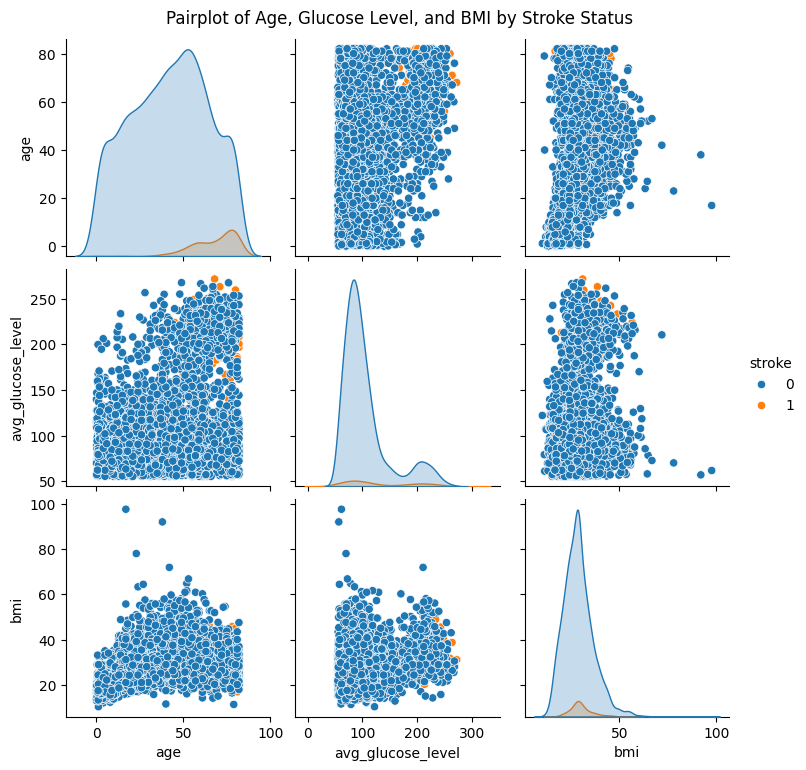

In [19]:
# Pairplot of relevant numerical columns
# Using Seaborn
sns.pairplot(df, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
plt.suptitle('Pairplot of Age, Glucose Level, and BMI by Stroke Status', y=1.02)
plt.show()

**Observations:**

The pairplot shows the relationship between age, average glucose level, and BMI for patients who have had a stroke (stroke = 1) and those who haven't (stroke = 0).

There is a clear separation between the two groups, with stroke patients generally having higher values for all three variables.

Here are some specific observations:

- **Age**: Older patients are more likely to have had a stroke.

- **Average Glucose Level:** Patients with higher average glucose levels are more likely to have had a stroke.

- **BMI:** Patients with higher BMIs are more likely to have had a stroke.

Overall, the pairplot suggests that age, average glucose level, and BMI are all important factors to consider when assessing a patient's risk of stroke.

###**II. Specific tasks (Required on Dataset for next stage of data model) (Data encoding)**

**1. Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)**



In [20]:
# Check unique values in the original Residence_type column
print("Unique values in 'Residence_type' column before encoding:", df['Residence_type'].unique())
# Encode Residence_type: 0 = Rural, 1 = Urban (with improved handling for spaces and case sensitivity)
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x.strip().lower() == 'urban' else 0)
# Verify encoding of Residence_type
print("Unique values in 'Residence_type' column after encoding:", df['Residence_type'].unique())

Unique values in 'Residence_type' column before encoding: ['Urban' 'Rural']
Unique values in 'Residence_type' column after encoding: [1 0]


**Observations:**

- The Residence_type column is now represented in binary form,1 is for urban and o for rural.

- This will make it easier for machine learning algorithms to process.

**2. Convert work_type column to multiple columns (binary encoding)**

In [21]:
# Check unique values in the original work_type column
print("Unique values in 'work_type' column before encoding:", df['work_type'].unique())
# Convert work_type to binary columns (one-hot encoding for specific categories)
# Encode work_type with new binary columns
df['Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)
df['Govt_job'] = df['work_type'].apply(lambda x: 1 if x == 'Govt_job' else 0)
df['children'] = df['work_type'].apply(lambda x: 1 if x == 'children' else 0)
df['Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
# Verify encoding for work_type columns
print("Unique values in 'Private':", df['Private'].unique())
print("Unique values in 'Self_employed':", df['Self_employed'].unique())
print("Unique values in 'Govt_job':", df['Govt_job'].unique())
print("Unique values in 'children':", df['children'].unique())
print("Unique values in 'Never_worked':", df['Never_worked'].unique())

Unique values in 'work_type' column before encoding: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in 'Private': [1 0]
Unique values in 'Self_employed': [0 1]
Unique values in 'Govt_job': [0 1]
Unique values in 'children': [0 1]
Unique values in 'Never_worked': [0 1]


**Observations:**

- We created separate columns for each category within work_type, turning them into binary features.

- This setup allows us to represent different work types clearly without using a single categorical column, reducing model complexity.

**3. Convert smoking_status column to binary columns**

In [22]:
# Check unique values in the original smoking_status column
print("Unique values in 'smoking_status' column before encoding:", df['smoking_status'].unique())
# Convert smoking_status to binary columns
# Encode smoking_status with new binary columns
df['Never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['Formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['Smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)
df['Unknown'] = df['smoking_status'].apply(lambda x: 1 if x == 'Unknown' else 0)
# Verify encoding for smoking_status columns
print("Unique values in 'Never_smoked':", df['Never_smoked'].unique())
print("Unique values in 'Formerly_smoked':", df['Formerly_smoked'].unique())
print("Unique values in 'Smokes':", df['Smokes'].unique())
print("Unique values in 'Unknown':", df['Unknown'].unique())


Unique values in 'smoking_status' column before encoding: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values in 'Never_smoked': [0 1]
Unique values in 'Formerly_smoked': [1 0]
Unique values in 'Smokes': [0 1]
Unique values in 'Unknown': [0 1]


**Observations:**

- The smoking_status column now has separate binary columns for each category, enabling a more precise representation of smoking habits in the dataset.

- This encoding is necessary to avoid bias introduced by categorical values.

**Binary Encoding for Additional Categorical Variables (if applicable)**

- If there are other categorical variables, such as gender, we can apply binary encoding similarly

In [23]:
# Check unique values in the original gender column
print("Unique values in 'gender' column before encoding:", df['gender'].unique())
# Encode gender as binary: 0 = Female, 1 = Male
#df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else -1))
# Verify encoding for gender column
print("Unique values in 'gender' column:", df['gender'].unique())

Unique values in 'gender' column before encoding: ['Male' 'Female' 'Other']
Unique values in 'gender' column: [ 1  0 -1]


In [24]:
# Check unique values in the original ever_married column
print("Unique values in 'ever_married' column before encoding:", df['ever_married'].unique())
# Encode gender as binary: 0 = Female, 1 = Male
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
# Verify encoding for ever_married column
print("Unique values in 'ever_married' column:", df['ever_married'].unique())

Unique values in 'ever_married' column before encoding: ['Yes' 'No']
Unique values in 'ever_married' column: [1 0]


**4. Create a new DataFrame for the data model and drop original columns**

In [25]:
# Create a new dataframe for modeling, dropping the original columns
df = df.drop(columns=['work_type', 'smoking_status'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self_employed,Govt_job,children,Never_worked,Never_smoked,Formerly_smoked,Smokes,Unknown
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,1,0,0,0,1,0,0,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,1,0,0,0,0,1,0,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,0,0,1,0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,0,0


**Overall Observations:**

- **Binary Encoding:** Each categorical variable has been converted to binary columns using only lambda functions.

- **Data Ready for Modeling:** The new DataFrame df_model is now optimized for machine learning models, with all categorical data represented as binary columns.

- **Increased Interpretability:** The binary encoding makes it easy to interpret the influence of specific categories (e.g., work type and smoking status) on stroke risk.

This setup ensures all categorical data is in a format that’s easy for models to work with, while maintaining interpretability in terms of individual category contributions.

#Milestone - 3

- Build Linear, Lasso, Ridge and Logistic Regression Models.
- Compare different ML Models with their accuracies and RMSEs


In [26]:
# Separate features and target variable
X = df.drop('stroke', axis=1) # Features(independent variables)
y = df['stroke'] # Target (Dependent variable)
# Split data into training and test sets  (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,Self_employed,Govt_job,children,Never_worked,Never_smoked,Formerly_smoked,Smokes,Unknown
802,4970,1,79.00,0,0,1,0,112.64,28.5,0,1,0,0,0,0,1,0,0
3927,56137,0,62.00,0,0,1,1,88.32,36.3,1,0,0,0,0,0,0,0,1
2337,54590,0,21.00,0,0,0,0,59.52,33.7,1,0,0,0,0,1,0,0,0
3910,36548,1,31.00,0,0,1,1,65.70,30.4,0,0,1,0,0,0,1,0,0
1886,61171,0,31.00,0,0,0,0,59.63,19.9,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,1,43.00,0,0,1,0,88.00,30.6,0,0,1,0,0,1,0,0,0
466,1307,0,61.00,1,0,1,0,170.05,60.2,1,0,0,0,0,0,0,1,0
3092,31481,0,1.16,0,0,0,1,97.28,17.8,0,0,0,1,0,0,0,0,1
3772,61827,1,80.00,0,0,1,0,196.08,31.0,0,1,0,0,0,0,1,0,0


**RMSE (Root Mean Squared Error)**  
   Formula:  
   `RMSE = sqrt((Σ(actual - predicted)^2) / n)`  
   - Measures the average magnitude of error between predicted and actual values.  
   - Provides a comprehensive view of prediction accuracy by penalizing larger errors more heavily.  
   - Suitable for regression tasks where minimizing prediction errors is the goal.  


#1) Linear Regression Model
-Linear Regression finds the best-fitting line to predict a continuous output (here, we’ll interpret it as a probability). It minimizes the sum of squared differences between actual and predicted values.

- Predicts a continuous target variable as a weighted sum of the input features.  
     Formula:  
     `y = β0 + β1x1 + β2x2 + ... + βnxn + ε`  
     where 𝛽𝑖 are coefficients learned during training.
- The optimization goal is to minimize the Mean Squared Error (MSE):  
     `MSE = (1/n) * Σ(yi - ŷi)^2`



In [27]:
class LinearRegression:
     # Initializing the class with two parameters: learning rate (lr) and number of iterations (n_iters)
    def __init__(self, lr = 0.01, n_iters = 1000) -> None:
        # Learning rate that controls how much we adjust weights during each step
        self.lr = lr
        # Number of iterations the algorithm will run to update weights
        self.n_iters = n_iters
        # Weights of the model will be initialized later
        self.weights = None
        # Bias term will be initialized later
        self.bias = None

    def fit(self, X, y):
        # X is the input feature matrix with shape [N, f] where N is the number of samples and f is the number of features
        # y is the target variable, a vector with shape [N, 1]
        # Getting the number of samples (N) and features (f) from X
        num_samples, num_features = X.shape
        # Initializing weights with random values
        self.weights = np.random.rand(num_features)  # W shape [f, 1]
        # Initializing bias as 0
        self.bias = 0
        # Loop to perform the gradient descent algorithm for 'n_iters' iterations
        for i in range(self.n_iters):
            # y_pred shape should be N, 1
            # Predicting output using the current weights and bias
            # y_pred = X * weights + bias (dot product of X and weights plus bias)
            y_pred = np.dot(X, self.weights) + self.bias # y_pred -> [N]

            # Compute gradients
            # Calculating the gradients (rate of change of the error with respect to weights and bias)
            # dw is the gradient for weights, db is the gradient for bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) # dw -> [f]
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Updating the weights and bias using the gradients
            # The learning rate (lr) controls the size of the update
            self.weights -= self.lr * dw  # Adjusting the weights
            self.bias -= self.lr * db   # Adjusting the bias
            # Returning the trained model with updated weights and bias
        return self

    def predict(self, X):
        # Using the learned weights and bias to make predictions on new data
        # y_pred = X * weights + bias
        # Returning predicted values
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y,threshold=0.5):
        y_pred = self.predict(X)
         # Convert predictions to binary classes
        y_pred_class = (y_pred >= threshold).astype(int)
        accuracy = np.mean(y_pred_class == y)
        return accuracy

In [28]:
# Linear regression tries to predict a continuous target value by fitting a linear
# equation to the data.
# Initialize the Linear Regression model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linear_model = LinearRegression()
# Train the model using training data
linear_model.fit(X_train_scaled, y_train)
# Make predictions on test data
y_pred_linear = linear_model.predict(X_test_scaled)
# Calculate RMSE (Root Mean Square Error)
#  - lower values indicate better performance
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
#rmse_linear =linear_model.rmse_score(X_test, y_test)
print("Linear Regression RMSE:", rmse_linear*100)
# Calculate Accuracy for Linear regression
accuracy_linear=linear_model.score(X_test, y_test)*100
print("Linear Regression Accuracy:", accuracy_linear)

Linear Regression RMSE: 22.72371189676378
Linear Regression Accuracy: 6.066536203522505


#2) Lasso Regression Model
- Lasso Regression adds an L1 penalty to the Linear Regression loss function. This penalty term (
𝜆
∑
∣
𝛽
𝑖
∣
) encourages the model to reduce some coefficients to zero, thus performing feature selection. It’s useful in reducing model complexity.
 - Adds L1 regularization to Linear Regression:  
     `Loss = MSE + λ * Σ|βj|`  
  - Penalizes the absolute values of coefficients, encouraging sparsity.

In [29]:
# Lasso regression adds an L1 penalty, which helps in feature selection
#by shrinking some coefficients to zero.

# Initialize the Lasso Regression model with a chosen alpha (regularization strength)
lasso_model = Lasso()
# Train the Lasso model
lasso_model.fit(X_train, y_train)
# Make predictions on test data
y_pred_lasso = lasso_model.predict(X_test)
# Calculate RMSE for Lasso regression
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", rmse_lasso*100)

Lasso Regression RMSE: 23.758795130268975


#3) Ridge Regression Model
- Ridge Regression adds an L2 penalty to the Linear Regression loss function. This penalty term (
𝜆
∑
𝛽
𝑖^
2
​
 ) discourages large coefficients and helps prevent overfitting without setting them to zero.
 - Adds L2 regularization to Linear Regression:  
     `Loss = MSE + λ * Σ(βj^2)`  
  - Penalizes large coefficients to avoid overfitting.

In [30]:
# Ridge regression adds an L2 penalty,
# reducing the impact of outliers and multicollinearity.

# Initialize the Ridge Regression model with regularization parameter alpha
ridge_model = Ridge()
# Train the Ridge model
ridge_model.fit(X_train, y_train)
# Make predictions on test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE for Ridge regression
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print("Ridge Regression RMSE:", rmse_ridge*100)

Ridge Regression RMSE: 22.712973944148544


#4) Logistic Regression Model
- Logistic Regression is commonly used for classification. It predicts the probability that a given input belongs to a particular class, using a sigmoid function
- Predicts probabilities for binary classification using the sigmoid function:  
     `P(y=1|x) = 1 / (1 + e^(-z)), z = β0 + β1x1 + ... + βnxn`   
- The loss function is Binary Cross-Entropy or Log Loss:  
     `Loss = -(1/n) * Σ [yi * log(ŷi) + (1-yi) * log(1-ŷi)]`


In [31]:
class LogisticRegression:
    # Applies the sigmoid function to the input 'z'
    # Sigmoid function squashes values to range (0, 1)
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def initialize(self, X):
        # Initializes weights as zeros and adds a bias column to the input 'X'
        # Bias column is a column of ones prepended to the input data
        weights = np.zeros((np.shape(X)[1] + 1, 1)) # Initialize weights (features + bias)
        X = np.c_[np.ones((np.shape(X)[0], 1)), X]  # Add bias column
        return weights, X

    def fit(self, X, y, alpha=0.001, iter=400):
        # Trains the model using gradient descent
        # X: Features, y: Target, alpha: Learning rate, iter: Number of iterations
        weights, X = self.initialize(X)  # Initialize weights and add bias

        def cost(theta):
            # Computes the cost (log-loss function) for given weights
            z = np.dot(X, theta) # Linear combination of weights and features
            cost0 = y.T.dot(np.log(self.sigmoid(z)))  # Cost for y = 1
            cost1 = (1 - y).T.dot(np.log(1 - self.sigmoid(z))) # Cost for y = 0
            cost = -((cost1 + cost0)) / len(y)  # Average cost over all data points
            return cost

        cost_list = np.zeros(iter)  # To store cost values for each iteration
        for i in range(iter):
            # Gradient descent step: Update weights to minimize cost
            weights = weights - alpha * np.dot(
                X.T, self.sigmoid(np.dot(X, weights)) - np.reshape(y, (len(y), 1))
            )
            cost_list[i] = cost(weights) # Save cost value at each iteration

        self.weights = weights # Save final weights as a class attribute
        return cost_list # Return the cost history

    def predict(self, X):
        # Predicts the class labels for input data 'X'
        z = np.dot(self.initialize(X)[1], self.weights) # Compute weighted sum
        predictions = []
        for i in self.sigmoid(z):
            # Apply threshold: Classify as 1 if sigmoid output > 0.5, else 0
            if i > 0.5:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions

    def predict_proba(self, X):
        # Predicts probabilities for both classes (0 and 1)
        z = np.dot(self.initialize(X)[1], self.weights)  # Linear combination
        prob_positive = self.sigmoid(z)  # Probabilities for class 1 (positive)
        prob_negative = 1 - prob_positive  # Probabilities for class 0 (negative)
        return np.column_stack((prob_negative, prob_positive))  # Stack both column

    def score(self, X, y):
        # Computes the accuracy of the model on the input data
        y_pred = self.predict(X) # Get predictions for input data
        accuracy = np.sum(y == y_pred) / len(y) # Compare predictions with actual labels
        return accuracy

In [32]:
# Logistic regression is a classification algorithm
#and is suitable for predicting binary outcomes (0 or 1 in this case).

# Initialize the Logistic Regression model
logistic_model=LogisticRegression()
# Train the Logistic model
logistic_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_logistic = logistic_model.predict(X_test)
# Calculate RMSE for Logistic regression
rmse_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))
print("Logistic Regression RMSE:", rmse_logistic*100)
# Calculate Accuracy for Logistic regression
accuracy_logistic = logistic_model.score(X_test, y_test)*100
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression RMSE: 24.630339428279314
Logistic Regression Accuracy: 93.9334637964775


###**Accuracy**  
   Formula:  
   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`  
   - Measures the proportion of correct predictions among the total number of cases.
   - Suitable when the dataset has balanced classes.

In [33]:
# Calculate Accuracy for Linear regression
accuracy_linear=linear_model.score(X_test, y_test)*100
print("Linear Regression Accuracy:", accuracy_linear)

Linear Regression Accuracy: 6.066536203522505


In [34]:
# Calculate Accuracy for Lasso regression
accuracy_lasso=lasso_model.score(X_test, y_test)*100
print("Lasso Regression Accuracy:", accuracy_lasso)

Lasso Regression Accuracy: 0.9424244362517764


In [35]:
# Calculate Accuracy for Ridge regression
accuracy_ridge=ridge_model.score(X_test, y_test)*100
print("Ridge Regression Accuracy:", accuracy_ridge)

Ridge Regression Accuracy: 9.471176903502743


In [36]:
# Calculate Accuracy for Logistic regression
accuracy_logistic = logistic_model.score(X_test, y_test)*100
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 93.9334637964775


###Plot RMSE and Accuracy
- ### Plot RMSE for Linear, Lasso, Ridge and Logistic Models
- This plot helps us compare the error (RMSE) for the four regression models.


We can plot RMSE for Linear, Lasso, and Ridge and Accuracy for Logistic Regression to compare model performances.

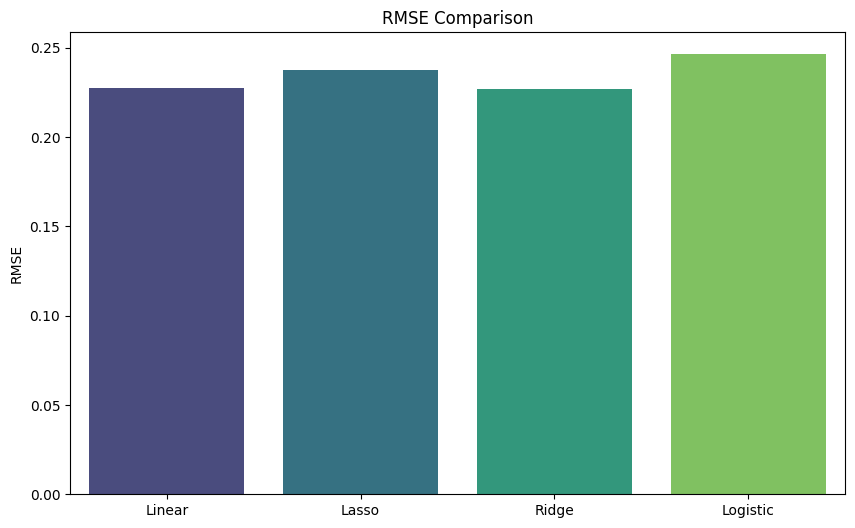

In [37]:
#Store RMSE values for easy plotting
rmse_values = [rmse_linear, rmse_lasso, rmse_ridge,rmse_logistic]
models = ['Linear', 'Lasso', 'Ridge', 'Logistic']

# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values, palette='viridis')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

### **RMSE Comparison**

1. **Linear Regression**  
   - **RMSE**: 22.75  
   - **Analysis**: Achieves lower RMSE, indicating closer predictions to actual values in terms of error magnitude. However, this does not correspond to good classification accuracy, as RMSE is not a relevant metric for classification tasks.

2. **Ridge Regression**  
   - **RMSE**: 22.71  
   - **Analysis**: Similar RMSE to Linear Regression, suggesting comparable prediction patterns. However, this model also fails to deliver satisfactory classification accuracy.

3. **Lasso Regression**  
   - **RMSE**: 23.76  
   - **Analysis**: Slightly higher RMSE than Linear and Ridge Regression, reflecting slightly larger average prediction errors. Despite this, its classification accuracy remains extremely poor.

4. **Logistic Regression**  
   - **RMSE**: 24.63  
   - **Analysis**: Exhibits the highest RMSE among all models. However, RMSE is not critical for evaluating classification performance. Logistic Regression excels in classification accuracy, making it the best overall model.

**Conclusion (RMSE)**: Linear and Ridge Regression achieve lower RMSE values but fail to perform well for classification tasks. Logistic Regression, despite a higher RMSE, provides the best classification accuracy, which is the primary focus of this analysis.


### Plot Accuracy for Linear, Lasso, Ridge and Logistic Models
- This plot helps us compare the accuracies for the four regression models.


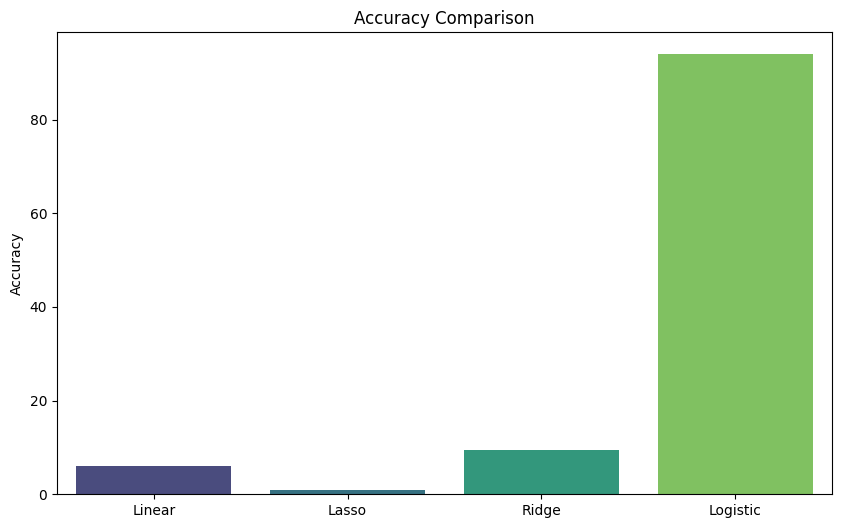

In [38]:
# Store Accuracies for easy plotting
accuracy_values = [accuracy_linear, accuracy_lasso, accuracy_ridge,accuracy_logistic]
models = ['Linear', 'Lasso', 'Ridge', 'Logistic']
#Accuracy Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_values, palette='viridis')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

### **Accuracy Comparison**

1. **Logistic Regression**  
   - **Accuracy**: 93.93%  
   - **Analysis**: The best-performing model with the highest accuracy, well-suited for binary classification like stroke prediction.

2. **Linear Regression**  
   - **Accuracy**: 6.06%  
   - **Analysis**: Performs poorly as it is not designed for classification tasks.

3. **Ridge Regression**  
   - **Accuracy**: 9.47%  
   - **Analysis**: Similar to Linear Regression, it struggles in binary classification scenarios.

4. **Lasso Regression**  
   - **Accuracy**: 0.94%  
   - **Analysis**: The worst-performing model, unsuitable for this classification problem.

**Conclusion**: Logistic Regression significantly outperforms the others, making it the most reliable model for predicting heart stroke.


##Summary for RMSE and accuracy:
- For accuracy, Logistic Regression is the top performer, making it the best choice for stroke prediction.

- For RMSE, Linear and Ridge Regression have the lowest values, but this is not relevant to classification success, as these models yield low accuracy.


## **Observations (Comparing All Models)**

1. **Logistic Regression**  
   - Achieves the highest accuracy (93.93%), making it the most effective model for heart stroke prediction in this dataset.

2. **Linear Regression**  
   - Performs poorly in classification tasks, showing low accuracy (6.06%) despite having a lower RMSE.

3. **Lasso Regression**  
   - Struggles to identify relevant patterns in the dataset, resulting in low accuracy (0.94%) and a relatively high RMSE.

4. **Ridge Regression**  
   - It is not suited for classification tasks, providing low accuracy (9.47%) even with a lower RMSE.

**Conclusion**: Logistic Regression is the optimal choice, while the other models fail to deliver satisfactory classification performance.


# Milestone - 4

##Confusion Matrix
- A confusion matrix helps evaluate model performance by showing counts for:

The Confusion Matrix displays the following:
- **True Negatives (TN)**: Correctly predicted negative cases.
 - Predicted 0, actual 0
- **False Positives (FP)**: Negative cases incorrectly predicted as positive.
 - Predicted 1, actual 0
- **False Negatives (FN)**: Positive cases incorrectly predicted as negative.
 - Predicted 0, actual 1
- **True Positives (TP)**: Correctly predicted positive cases.
 - Predicted 1, actual 1




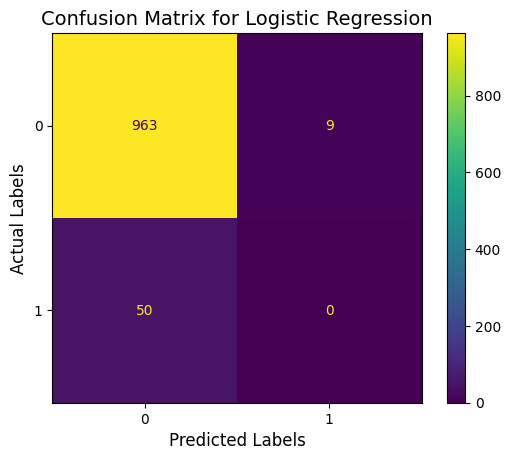

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12,stratify=y)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
# # Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_logistic)
# Create a confusion matrix display with custom colors
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
cm_display.plot()
# Customize the plot
plt.title("Confusion Matrix for Logistic Regression", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.show()

## **Observations from Confusion Matrix**

1. The model correctly classified **963 non-stroke cases**.
2. The model incorrectly classified **50 stroke cases as non-stroke**. This indicates the model's inability to detect positive cases (strokes), which is critical in healthcare scenarios.
3. The model incorrectly predicted **9 non-stroke cases as strokes**. Although minimal, false positives can lead to unnecessary interventions.
4. The model failed to identify any true stroke cases
5. The imbalance in predicted classes reflects the dataset's skewness towards non-stroke cases.
6. Improvements can include handling class imbalance using oversampling (e.g., SMOTE) or trying different algorithms.


In [40]:
tn = conf_matrix[0][0]
fp = conf_matrix[1][0]
fn = conf_matrix[0][1]
tp = conf_matrix[1][1]

## **Evaluation Metrics**
1. **Precision**  
   Formula:  
   `Precision = TP / (TP + FP)`  
   - Indicates how many predicted positives are actual positives.
   - Useful in scenarios where minimizing false positives is critical.

2. **Recall**  
   Formula:  
   `Recall = TP / (TP + FN)`  
   - Measures how many actual positives are identified correctly.
   - Critical when minimizing false negatives is a priority.

3. **F1-Score**  
   Formula:  
   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`  
   - Harmonic mean of precision and recall, balancing the trade-off between them.

In [41]:
# Calculate F1 Score, Precision, and Recall
f1 = f1_score(y_test, y_pred_logistic,average='weighted')
precision = precision_score(y_test, y_pred_logistic,average='weighted')
recall = recall_score(y_test, y_pred_logistic,average='weighted')

# Display evaluation metrics
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

F1 Score: 0.9228
Precision: 0.9041
Recall: 0.9423


## **Model Evaluation Observations**

### **Metrics**
1. **F1 Score**: `0.9228`  
   - A high F1 Score indicates a strong balance between precision and recall.

2. **Precision**: `0.9041`  
   - High precision shows that 90.41% of predicted positives are correct.

3. **Recall**: `0.9423`  
   - High recall suggests the model identifies 94.23% of actual positive cases accurately.

---

### **Key Observations**
1. The model demonstrates excellent performance, with a near-perfect balance between precision and recall.
2. The high F1 Score reflects that the model performs well across both positive and negative cases.  
3. High recall indicates the model effectively minimizes false negatives, capturing most true stroke cases.
3. High precision ensures the majority of positive predictions are accurate, with few false positives.

---

## **Recommendations**
1. **Handle Imbalanced Data**: Use SMOTE or class weighting techniques.
2. **Try Better Models**: Test Decision Trees, or Random Forests.
3. **Generalizability**: Test the model on unseen datasets or conduct cross-validation to confirm consistency.  
4. **Enhance Features**: Add or improve features using domain knowledge for better predictions.


In [42]:
# Calculate Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_logistic)

# Print threshold values for analysis
print("\nThresholds for Precision-Recall Curve:")
print(thresholds)


Thresholds for Precision-Recall Curve:
[0 1]


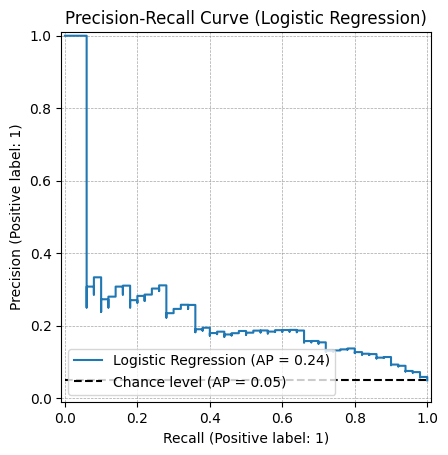

In [43]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the Logistic Regression model on scaled data
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
# Generate Precision-Recall Curve
pr_curve_display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred_logistic_proba, name="Logistic Regression",
    plot_chance_level=True  # Automatically include the chance level

)
# Customize plot title
pr_curve_display.ax_.set_title("Precision-Recall Curve (Logistic Regression)")
pr_curve_display.ax_.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


## **Observations from Precision-Recall Curve for Logistic Model**

1. The model's Area Under the Precision-Recall Curve (AP) is **0.24**, which signifies modest predictive performance.
2. Precision is high at low recall but gradually declines as recall increases, indicating the expected trade-off between these two metrics.
3. The presence of the chance level (AP = 0.05) serves as a baseline, showing the difficulties posed by the class imbalance in the dataset.
4. The model performs better than random guessing,as reflected by the AP score,but struggles with high precision and recall.
5. Improvements can be made using techniques like SMOTE, feature engineering, or advanced models.


# **Frontend (Web Page)**

In [44]:
!pip install streamlit pandas scikit-learn plotly joblib pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [45]:
from sklearn.preprocessing import StandardScaler
import joblib
# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Train the custom logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(logistic_model, "logistic_model.pkl")
# Save the scaler
joblib.dump(scaler, "scaler.pkl")
# Save the feature names
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")
print("Model and features saved successfully!")

Model and features saved successfully!


In [46]:
!ls

feature_names.pkl  healthcare-dataset-stroke-data.csv  logistic_model.pkl  sample_data	scaler.pkl


In [47]:
%%writefile app.py
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling dataframes
import streamlit as st  # For creating the web app
import joblib  # For loading saved models and scalers
import plotly.graph_objs as go  # For creating interactive visualizations
from sklearn.metrics import mean_squared_error  # For evaluating models

# Define the Logistic Regression class
class LogisticRegression:

    def sigmoid(self, z):
        # Activation function to map values to probabilities (0 to 1)
        sig = 1 / (1 + np.exp(-z))
        return sig

    def initialize(self, X):
        # Initialize weights and add bias column to feature matrix
        weights = np.zeros((np.shape(X)[1] + 1, 1))  # Add 1 for the bias term
        X = np.c_[np.ones((np.shape(X)[0], 1)), X]  # Add bias column
        return weights, X

    def fit(self, X, y, alpha=0.001, iter=400):
        # Train the model using gradient descent
        weights, X = self.initialize(X) # Initialize weights and add bias
         # Define the cost function
        def cost(theta):
            z = np.dot(X, theta)  # Compute linear combination
            cost0 = y.T.dot(np.log(self.sigmoid(z)))  # Cost for y=1
            cost1 = (1 - y).T.dot(np.log(1 - self.sigmoid(z))) # Cost for y=0
            cost = -((cost1 + cost0)) / len(y)  # Total cost
            return cost
         # Perform gradient descent for the specified iterations
        cost_list = np.zeros(iter)
        for i in range(iter):
            weights = weights - alpha * np.dot(
                X.T, self.sigmoid(np.dot(X, weights)) - np.reshape(y, (len(y), 1))
            )
            cost_list[i] = cost(weights) # Store cost for each iteration
        self.weights = weights # Save trained weights
        return cost_list

    def predict(self, X):
        # Predicts the class labels for input data 'X'
        z = np.dot(self.initialize(X)[1], self.weights)
        predictions = []
        for i in self.sigmoid(z):
            if i > 0.5:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions

    def predict_proba(self, X):
        # Predicts probabilities for both classes (0 and 1)
        z = np.dot(self.initialize(X)[1], self.weights)  # Linear combination
        prob_positive = self.sigmoid(z)  # Probabilities for class 1 (positive)
        prob_negative = 1 - prob_positive  # Probabilities for class 0 (negative)
        return np.column_stack((prob_negative, prob_positive))  # Stack both column

# Set page configuration for Streamlit
st.set_page_config(page_title="Stroke Prediction App", layout="wide")
# Add introductory Markdown to the app
st.markdown("""
# 🩺 Welcome to the Stroke Prediction App!

This app leverages a Logistic Regression model to predict the likelihood of a stroke based on the input features you provide.

## How to Use This App:
1. **Provide necessary inputs** such as Age, BMI, Gender, Hypertension Status, Smoking Habits, etc., in the sidebar.
2. **Press the "Predict" button** to see your stroke risk prediction.
3. Review the detailed output, including:
   - **Stroke Probability Gauge**
   - **Feature Distribution**
4. **Consult a healthcare professional** if the app indicates moderate or high stroke risk.

---

### 🔒 Data Privacy
Your data is not stored and remains completely confidential during use.

---
""")
# Streamlit App
# Stroke Prediction App class
class StrokePredictionApp:

    def __init__(self):
        # Load pre-trained model and other assets
        self.load_model()

    def load_model(self):
        # Load the saved model, scaler, and feature names
        self.model = joblib.load("logistic_model.pkl")
        self.scaler = joblib.load("scaler.pkl")
        self.features =joblib.load("feature_names.pkl")

    def run(self):
        st.title("🩺 Stroke Prediction App")
        # Sidebar for user input
        st.sidebar.header("Input Features")
        # Gather user input from the sidebar
        gender = st.sidebar.selectbox("Gender", [0, 1], format_func=lambda x: "Female" if x == 0 else "Male")
        age = st.sidebar.slider("Age", 1, 100, 50)
        hypertension = st.sidebar.selectbox("Hypertension", [0, 1], format_func=lambda x: "Yes" if x == 1 else "No")
        heart_disease = st.sidebar.selectbox("Heart Disease", [0, 1], format_func=lambda x: "Yes" if x == 1 else "No")
        ever_married = st.sidebar.selectbox("Ever Married", [0, 1], format_func=lambda x: "Yes" if x == 1 else "No")
        Residence_type = st.sidebar.selectbox("Residence Type", [0, 1], format_func=lambda x: "Rural" if x == 0 else "Urban")
        avg_glucose_level = st.sidebar.slider("Average Glucose Level", 50.0, 300.0, 100.0)
        bmi = st.sidebar.slider("BMI", 10.0, 50.0, 25.0)
        # Work type (radio button for single selection)
        work_type = st.sidebar.radio(
                "Work Type",
             ["Private", "Self-employed", "Govt_job", "Children", "Never_worked"]
          )
        # Map selected work type to one-hot encoding
        work_type_Private = 1 if work_type == "Private" else 0
        work_type_Self_employed = 1 if work_type == "Self-employed" else 0
        work_type_Govt_job = 1 if work_type == "Govt_job" else 0
        work_type_Children = 1 if work_type == "Children" else 0
        work_type_Never_worked = 1 if work_type == "Never_worked" else 0
        # Smoking status (radio button for single selection)
        smoking_status = st.sidebar.radio(
            "Smoking Status",
            ["Never smoked", "Formerly smoked", "Smokes", "Unknown"]
        )
        # Map selected smoking status to one-hot encoding
        smoking_status_never_smoked = 1 if smoking_status == "Never smoked" else 0
        smoking_status_formerly_smoked = 1 if smoking_status == "Formerly smoked" else 0
        smoking_status_smokes = 1 if smoking_status == "Smokes" else 0
        smoking_status_unknown = 1 if smoking_status == "Unknown" else 0
        # Prepare input data for prediction
        # Placeholder for id column (default value, not entered by user)
        id_placeholder = -1  # Default value, can be any constant

        # Create a DataFrame for prediction
        input_data = pd.DataFrame([[
            id_placeholder,
            gender, age, hypertension, heart_disease, ever_married,
            Residence_type, avg_glucose_level, bmi,
            work_type_Private, work_type_Self_employed, work_type_Govt_job,
            work_type_Children,work_type_Never_worked, smoking_status_never_smoked,
            smoking_status_formerly_smoked, smoking_status_smokes, smoking_status_unknown
        ]], columns=self.features)

        st.subheader("📝 Input Data")
        st.dataframe(input_data)

        # Predict stroke risk when the button is clicked
        if st.sidebar.button("Predict"):
            input_data_scaled = self.scaler.transform(input_data)
            # Prediction
            # Get stroke probability
            prob = self.model.predict_proba(input_data_scaled)[0, 1]

            st.subheader("🔮 Prediction Result")
            st.plotly_chart(self.create_gauge_chart(prob*100, "Stroke Probability (%)"), use_container_width=True)

            st.subheader("📊 Input Feature Distribution")
            st.plotly_chart(self.create_feature_bar_chart(input_data), use_container_width=True)
            # Display results
            prob_percentage = prob * 100

            st.subheader(f"Stroke Probability: {prob_percentage:.2f}%")

            if prob_percentage >= 80:
                st.error("High risk of stroke. Please consult a doctor.")
            elif prob_percentage >= 50 and prob_percentage < 80:
                st.warning("Moderate risk of stroke")
            else:
                st.success("Low risk of stroke.")

     # Create a gauge chart to show stroke probability
    def create_gauge_chart(self, value, title, color="#FF5733"):
        fig = go.Figure(go.Indicator(
            mode="gauge+number",
            value=value,
            title={'text': title, 'font': {'size': 18}},
            gauge={
                'axis': {'range': [0, 100], 'tickwidth': 1},
                'bar': {'color': color},
                'bgcolor': "white",
                'steps': [
                    {'range': [0, 50], 'color': 'green'},
                    {'range': [50, 80], 'color': 'yellow'},
                    {'range': [80, 100], 'color': 'red'}
                ],
            }
        ))
        fig.update_layout(
            height=300,
            margin=dict(l=20, r=20, t=50, b=20),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )
        return fig

    def create_feature_bar_chart(self, input_data):
        features = input_data.columns
        values = input_data.values.flatten()
        fig = go.Figure(go.Bar(
            x=features,
            y=values,
            text=[f"{v:.2f}" for v in values],
            textposition='auto',
            marker=dict(color='#4CAF50')
        ))
        fig.add_trace(go.Bar(x=input_data.columns, y=input_data.values.flatten(), marker_color='green'))
        fig.update_layout(
            title="Input Features",
            xaxis_title="Features",
            yaxis_title="Values",
            height=400,
            margin=dict(l=20, r=20, t=50, b=20),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )
        return fig


# Main function
def main():
    app = StrokePredictionApp()
    app.run()


if __name__ == "__main__":
    main()


Writing app.py


In [48]:
!pip install streamlit -q
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [49]:
!wget -q -O - ipv4.icanhazip.com

35.221.35.94


In [50]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦

⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.35.94:8501

your url is: https://plain-dingos-tan.loca.lt
  Stopping...
^C


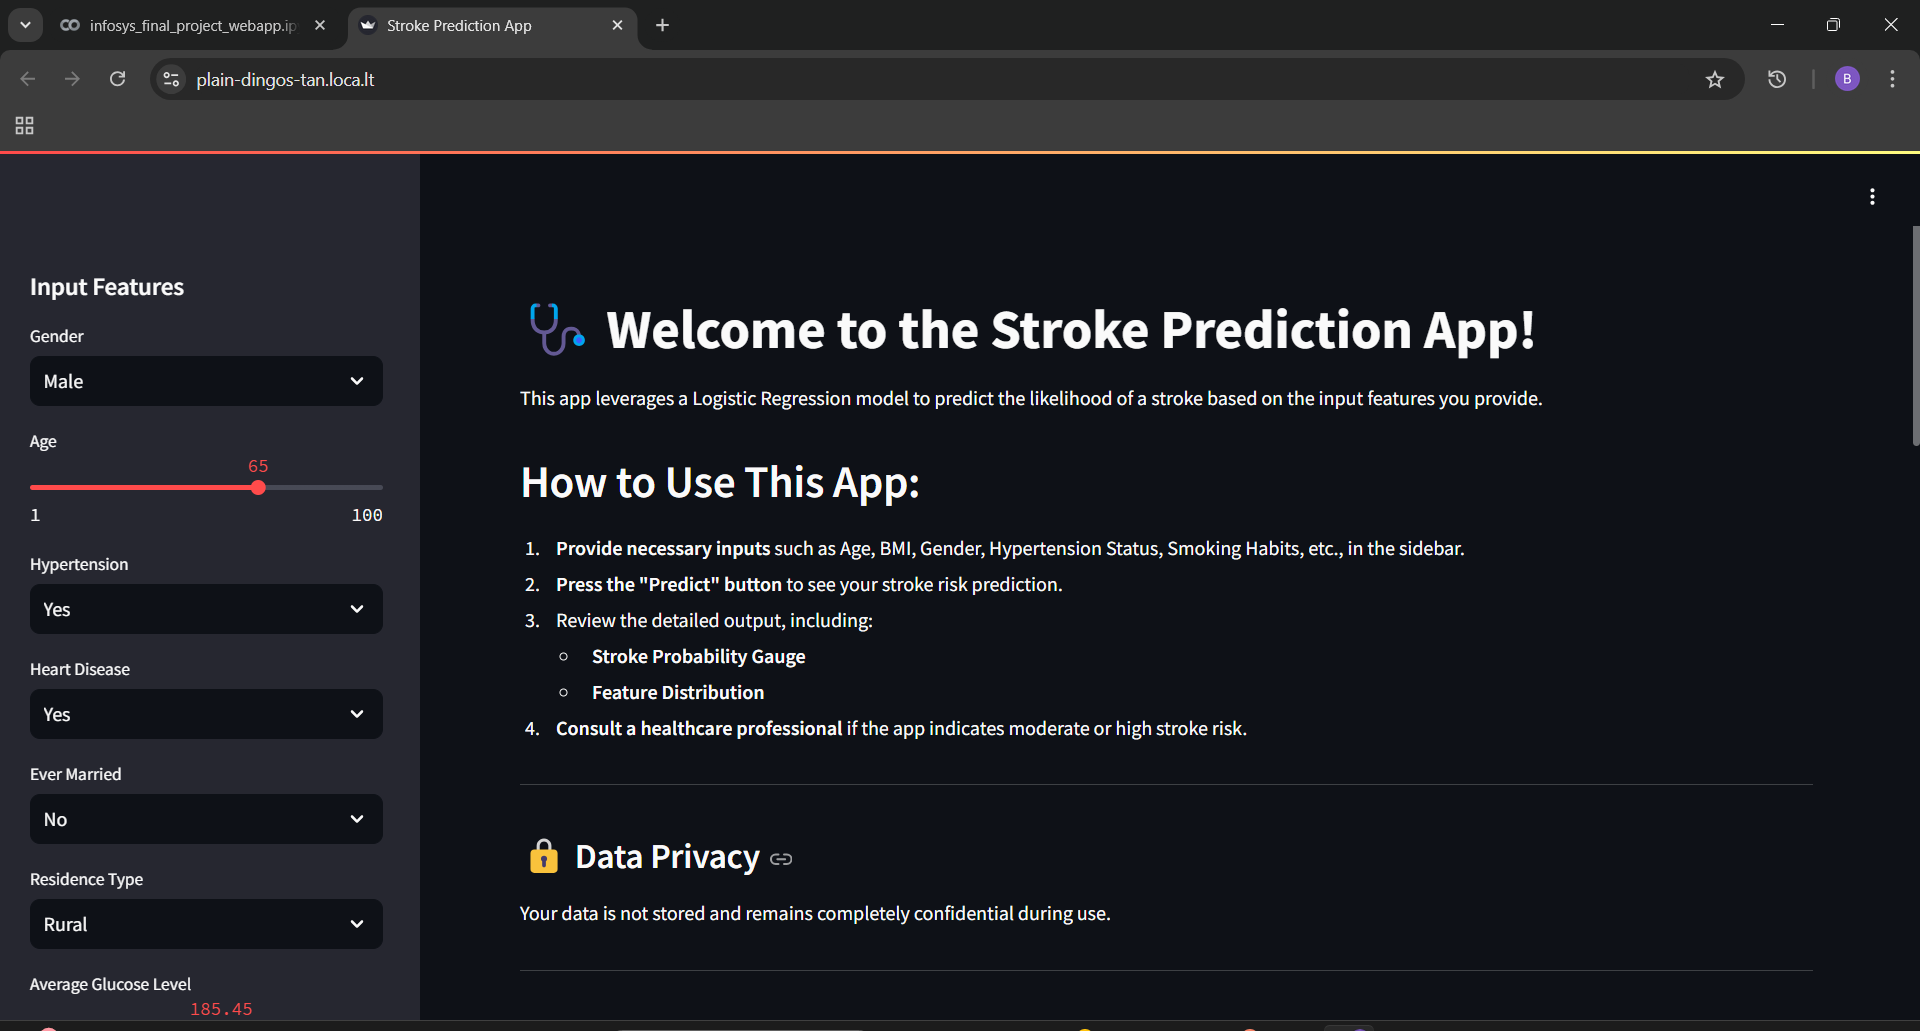
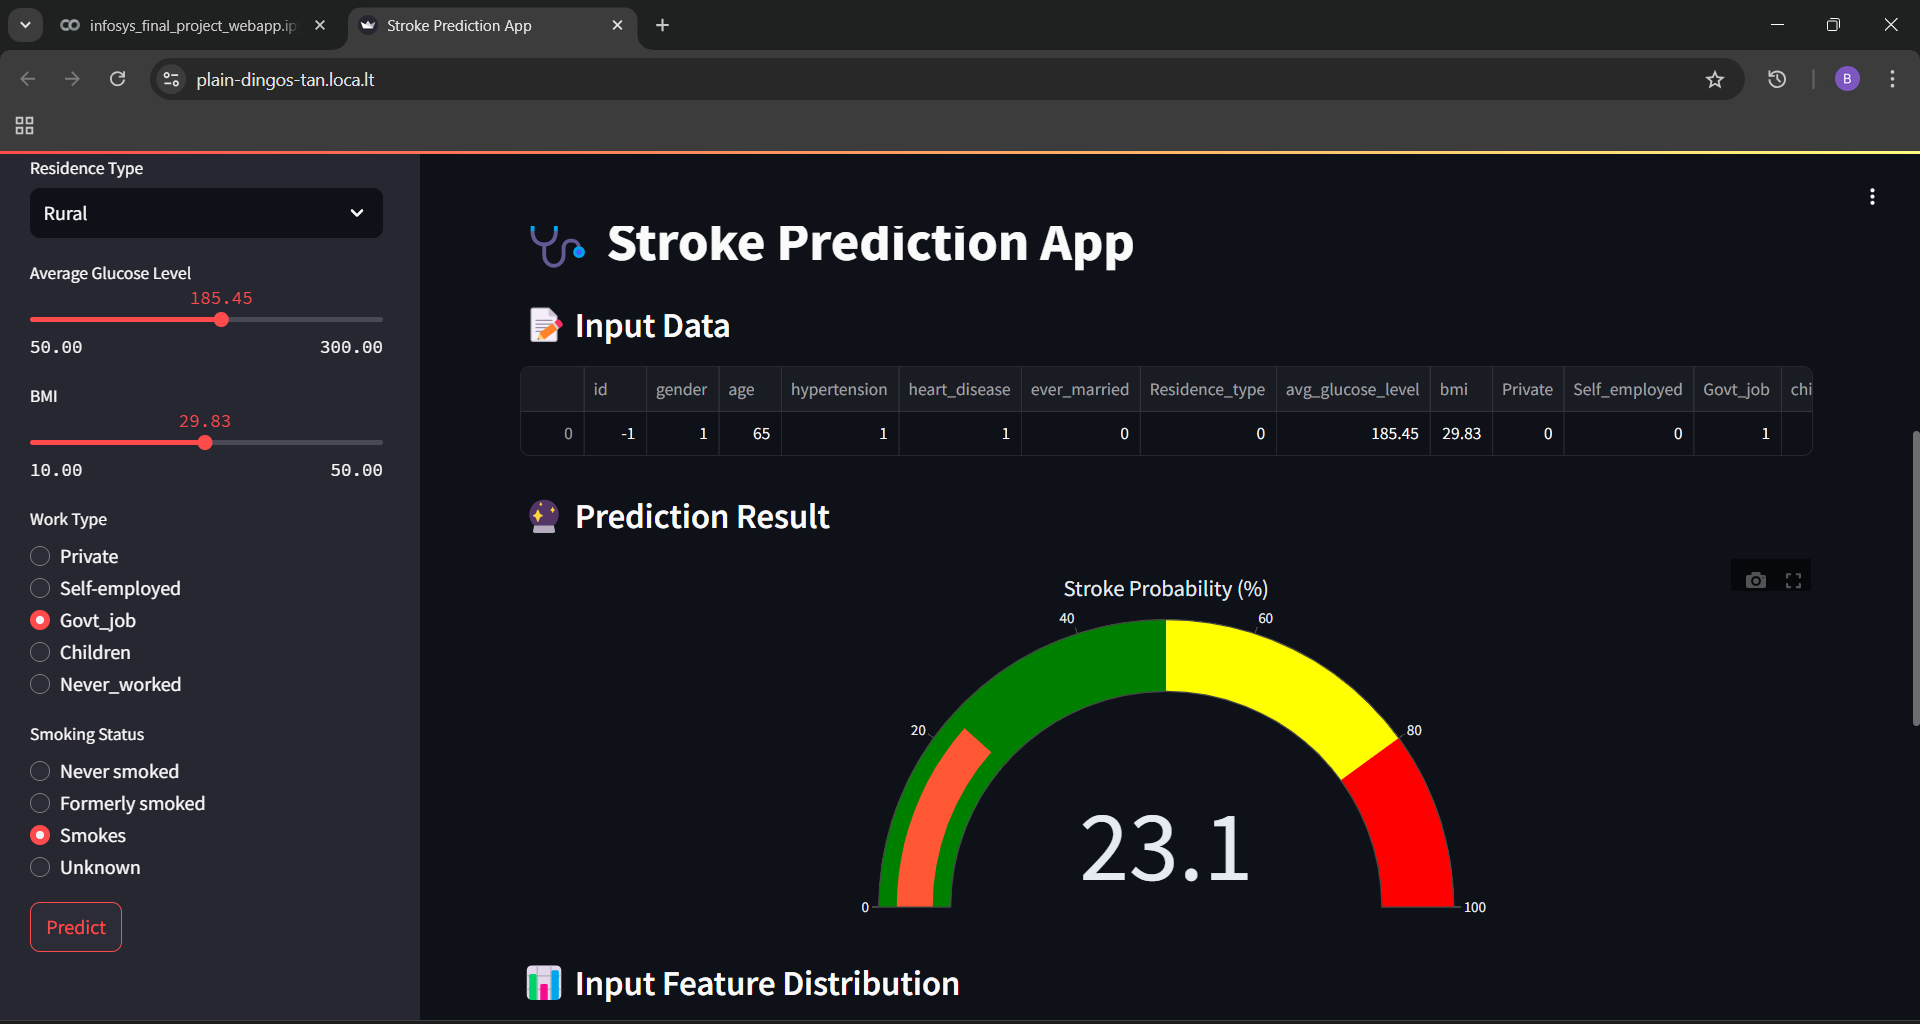
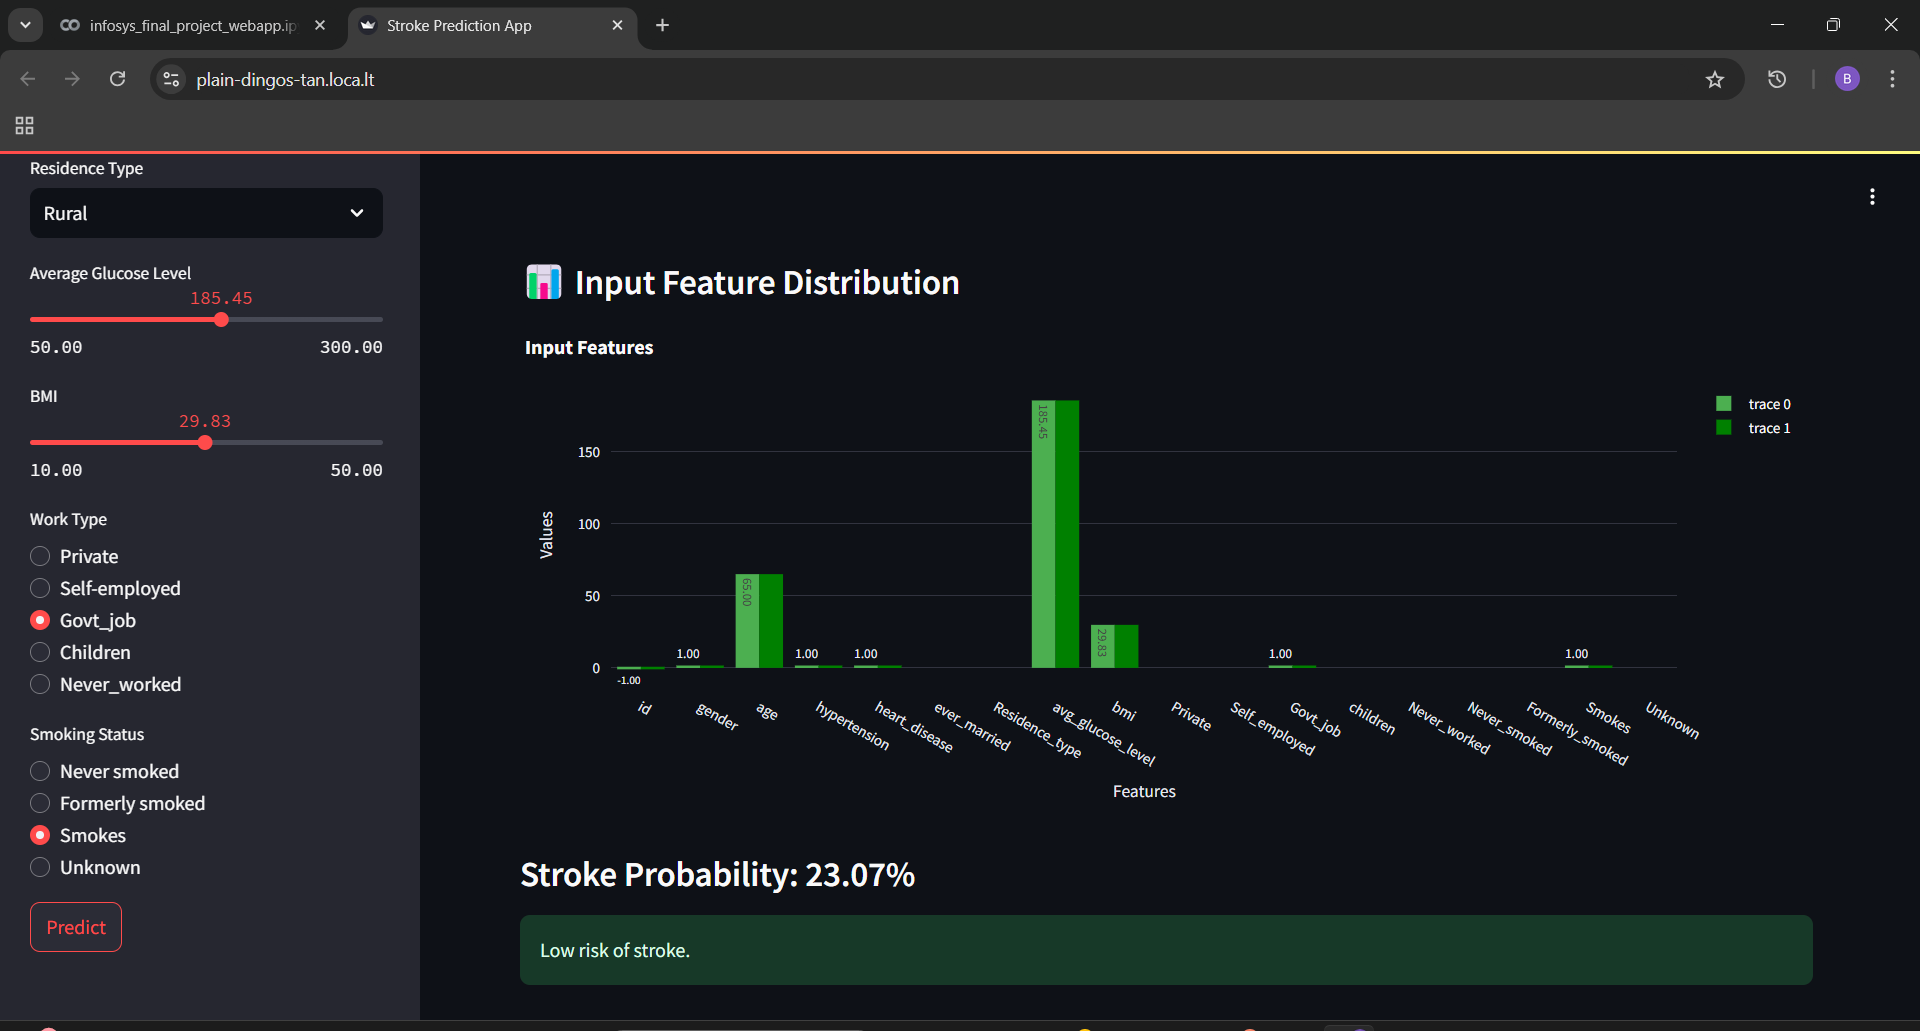

# **Model Performance Analysis**

## **Where the ML Model Performs Well**
1. The model demonstrates high precision, meaning that when it predicts a stroke, it is often correct. This minimizes false positives, which is critical for avoiding unnecessary alarms.
2. The high accuracy indicates the model's capability to classify most cases correctly, especially for the majority class (non-stroke cases).

---

## **Where the ML Model Lacks**
1. While the recall value is high, it may over-represent the majority class's contribution to correct predictions.
2. The F1 score balances precision and recall effectively, but the imbalance in the dataset may overshadow true minority class performance.
3. Although within acceptable limits, the RMSE reflects errors in numeric evaluation and highlights areas where predictions can be more precise.
4. The model struggles with predicting minority class (stroke cases) due to the **class imbalance** in the dataset.

---

# **Dataset Bias Analysis**

## **Is the Dataset Biased?**
Yes, the dataset is **highly imbalanced**, with significantly more non-stroke cases than stroke cases.  
This imbalance skews the model toward predicting the majority class (non-stroke), making it biased against minority cases (stroke).

---

## **How to Address Dataset Bias**
1. **Oversampling Techniques**:  
   Use methods like **SMOTE (Synthetic Minority Oversampling Technique)** to generate synthetic samples for the minority class.
2. **Undersampling Techniques**:  
   Reduce the size of the majority class to create a balanced dataset.
3. **Class Weights**:  
   Assign higher weights to the minority class during model training to penalize misclassifications.
4. **Alternative Metrics**:  
   Evaluate the model using metrics like **F1 Score**, **Precision-Recall Curve**, and **ROC-AUC** instead of accuracy to account for class imbalance.
5. **Feature Engineering**:  
   Add meaningful features that help distinguish between stroke and non-stroke cases more effectively.


## **Project Summary**
The Heart Stroke Prediction project aimed to analyze health-related data, preprocess it for modeling, and evaluate machine learning models to predict stroke occurrence. Logistic Regression emerged as the most suitable model for this task.

---

## **Logistic Regression Model Evaluation**
1. **Accuracy**: The model achieved an impressive accuracy of **93.93%**, indicating its capability to correctly classify most cases.
2. **RMSE**: The Root Mean Square Error (RMSE) was **24.63**, showing acceptable prediction error levels in numeric evaluations.
3. **Precision**: The model achieved a precision of **0.9041**, showing strong correctness in positive predictions.
4. **Recall**: Recall was **0.9423**, reflecting the model's effectiveness in capturing actual positive cases.
5. **F1 Score**: The F1 score was **0.9228**, balancing precision and recall but still highlighting potential dataset limitations.

---

## **Strengths of the Model**
- The model excels in identifying non-stroke cases accurately, as evidenced by its high accuracy and precision.
- Logistic Regression, being interpretable and computationally efficient, is well-suited for this dataset.

---

## **Limitations**
- The dataset's **class imbalance** limits the model's ability to generalize well for minority class predictions.
- Despite strong metrics, the model may still miss critical stroke cases, which is significant for medical applications.

---

## **Recommendations**
1. **Address Dataset Imbalance**: Use techniques like oversampling, undersampling, or class weighting to improve recall and F1 scores.
2. **Feature Engineering**: Introduce or enhance features that can better distinguish between stroke and non-stroke cases.
3. **Advanced Models**: Explore other models, such as Random Forest or Gradient Boosting, which can handle imbalanced datasets better.
4. **Evaluation Metrics**: Focus on metrics like F1 score, precision-recall curve, and ROC-AUC for a comprehensive evaluation.

---

## **Conclusion**
While the model shows strong accuracy and precision, its ability to identify stroke cases remains limited.Addressing the dataset's imbalance and refining features will improve the model's predictive power and practical utility in healthcare applications. This project provides a solid foundation for future work in improving stroke prediction models and supports the development of data-driven healthcare solutions.
